# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [3]:
import pandas as pd

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [4]:
sales.query("sales>10")

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [5]:
sales.query("year==2018")

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [6]:
sales.query("sales>13 & year==2018")

,employee,sales,year
0,Katrina,14,2018


In [9]:
sales.query("sales<13 & year!=2018")

,employee,sales,year
2,Jan,6,2020
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
8,Egweyn,5,2020


In [14]:
sales.query("sales/3>3")

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [17]:
filtered = sales[sales['employee'].str[0] > 'J']
filtered

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
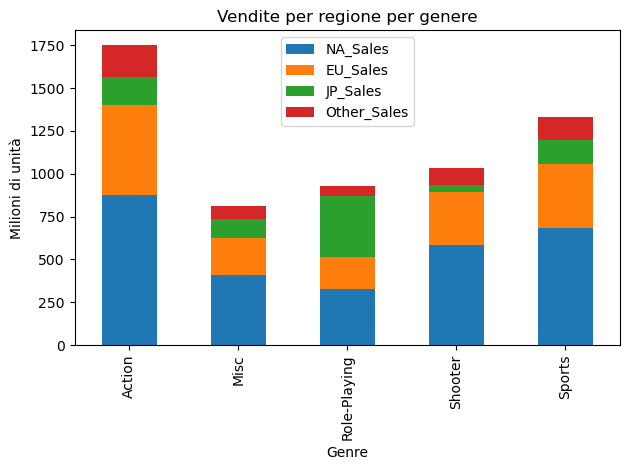


In [20]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
df["Name"].count()

np.int64(16598)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Wii Sports'),
  Text(1, 0, 'Super Mario Bros.'),
  Text(2, 0, 'Mario Kart Wii'),
  Text(3, 0, 'Wii Sports Resort'),
  Text(4, 0, 'Pokemon Red/Pokemon Blue'),
  Text(5, 0, 'Tetris'),
  Text(6, 0, 'New Super Mario Bros.'),
  Text(7, 0, 'Wii Play'),
  Text(8, 0, 'New Super Mario Bros. Wii'),
  Text(9, 0, 'Duck Hunt'),
  Text(10, 0, 'Nintendogs'),
  Text(11, 0, 'Mario Kart DS'),
  Text(12, 0, 'Pokemon Gold/Pokemon Silver'),
  Text(13, 0, 'Wii Fit'),
  Text(14, 0, 'Wii Fit Plus'),
  Text(15, 0, 'Kinect Adventures!'),
  Text(16, 0, 'Grand Theft Auto V'),
  Text(17, 0, 'Grand Theft Auto: San Andreas'),
  Text(18, 0, 'Super Mario World'),
  Text(19, 0, 'Brain Age: Train Your Brain in Minutes a Day')])

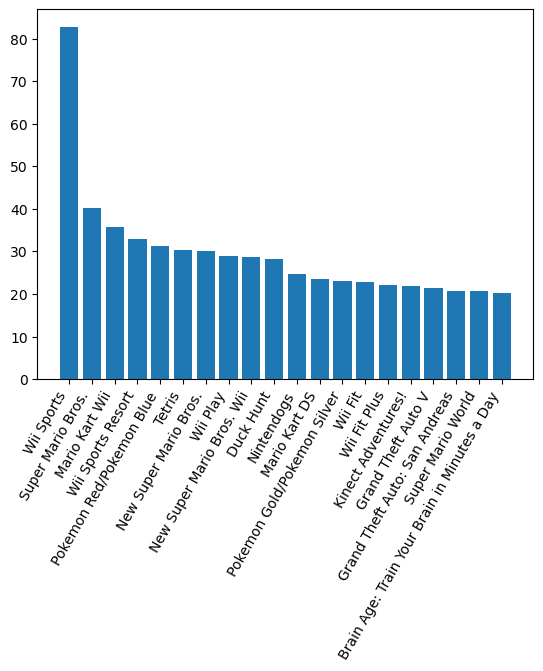

In [32]:
df.sort_values(by="Global_Sales")
bestSellers = df.head(20)
plt.bar(bestSellers["Name"], bestSellers["Global_Sales"])
plt.xticks(rotation=60, ha="right", va="top")

<Axes: xlabel='Year'>

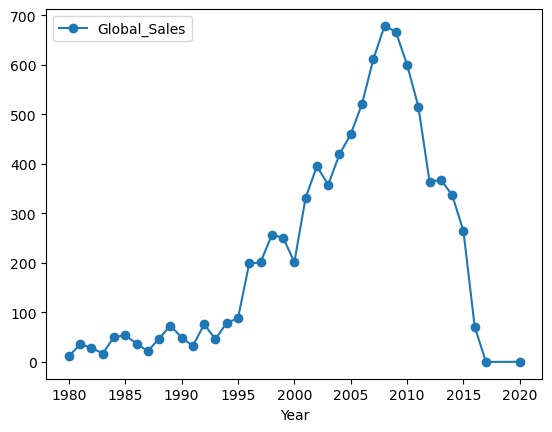

In [ ]:
df.sort_values(by="Year")
yearlySales = df.groupby("Year")["Global_Sales"].sum().reset_index()
yearlySales.plot(kind="line", x="Year", y="Global_Sales", marker='o')

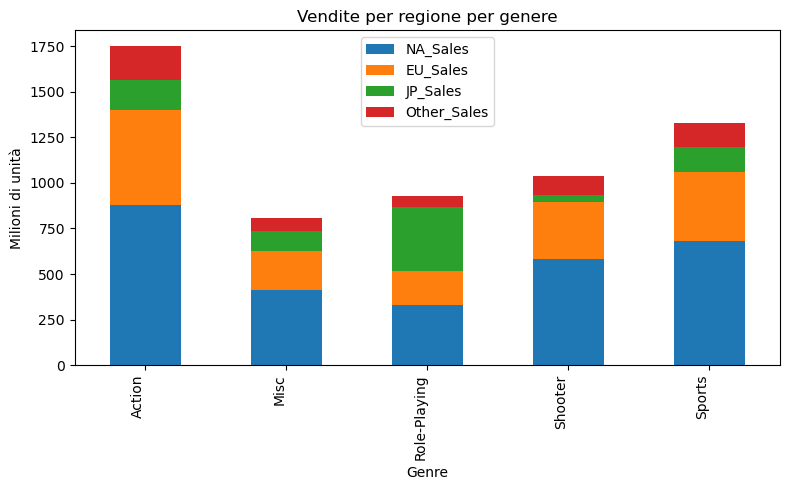

In [44]:
df_filtred = df[df['Genre'].isin(['Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports'])]
df_grouped = df_filtred.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
df_grouped.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.title('Vendite per regione per genere')
plt.xlabel('Genre')
plt.ylabel('Milioni di unità')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.tight_layout()
plt.show()